In [3]:
!wget https://os.unil.cloud.switch.ch/fma/fma_medium.zip


--2025-12-04 10:00:57--  https://os.unil.cloud.switch.ch/fma/fma_medium.zip
Resolving os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)... 86.119.28.16, 2001:620:5ca1:201::214
Connecting to os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)|86.119.28.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23825005356 (22G) [application/zip]
Saving to: ‘fma_medium.zip’

fma_medium.zip      100%[===================>]  22.19G  14.7MB/s    in 25m 53s 

2025-12-04 10:26:51 (14.6 MB/s) - ‘fma_medium.zip’ saved [23825005356/23825005356]



In [4]:
!unzip fma_medium.zip -d fma_medium/


Streaming output truncated to the last 5000 lines.
 bunzipping: fma_medium/fma_medium/015/015145.mp3  
 bunzipping: fma_medium/fma_medium/015/015148.mp3  
 bunzipping: fma_medium/fma_medium/015/015149.mp3  
 bunzipping: fma_medium/fma_medium/015/015152.mp3  
 bunzipping: fma_medium/fma_medium/015/015154.mp3  
 bunzipping: fma_medium/fma_medium/015/015156.mp3  
 bunzipping: fma_medium/fma_medium/015/015157.mp3  
 bunzipping: fma_medium/fma_medium/015/015176.mp3  
 bunzipping: fma_medium/fma_medium/015/015194.mp3  
 bunzipping: fma_medium/fma_medium/015/015195.mp3  
 bunzipping: fma_medium/fma_medium/015/015201.mp3  
 bunzipping: fma_medium/fma_medium/015/015202.mp3  
 bunzipping: fma_medium/fma_medium/015/015203.mp3  
 bunzipping: fma_medium/fma_medium/015/015204.mp3  
 bunzipping: fma_medium/fma_medium/015/015207.mp3  
 bunzipping: fma_medium/fma_medium/015/015208.mp3  
 bunzipping: fma_medium/fma_medium/015/015209.mp3  
 bunzipping: fma_medium/fma_medium/015/015210.mp3  
 bunzipping: 

In [ ]:
!pip install librosa pydub
!apt-get install ffmpeg



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [5]:
DATASET_DIR = "/content/fma_medium/fma_medium"

In [6]:
import os
import librosa
from IPython.display import Audio

# Recursively find all mp3 files
mp3_files = []
for root, dirs, files in os.walk(DATASET_DIR):
    for file in files:
        if file.lower().endswith(".mp3"):
            mp3_files.append(os.path.join(root, file))

print("Total mp3 files:", len(mp3_files))

Total mp3 files: 7565


In [9]:
audio_path = mp3_files[1]
print("Loading:", audio_path)

audio, sr = librosa.load(audio_path, sr=None,mono=False)
print("Shape:", audio.shape, "Sample Rate:", sr)

Audio(audio_path)

Loading: /content/fma_medium/fma_medium/038/038775.mp3
Shape: (2, 1321967) Sample Rate: 44100


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


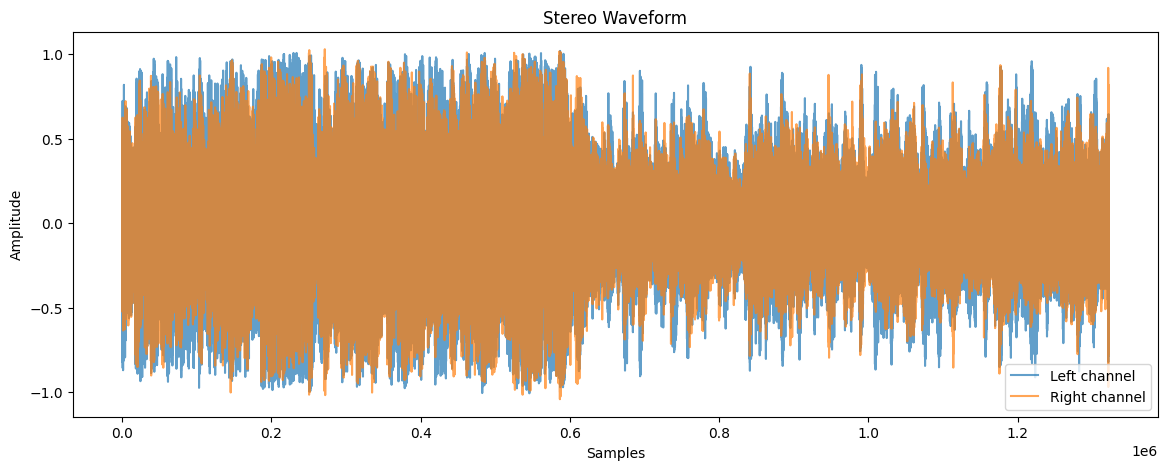

In [10]:
#Generating Normal Waveform

import librosa.display
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.title("Stereo Waveform")
plt.plot(audio[0], label="Left channel", alpha=0.7)
plt.plot(audio[1], label="Right channel", alpha=0.7)
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()


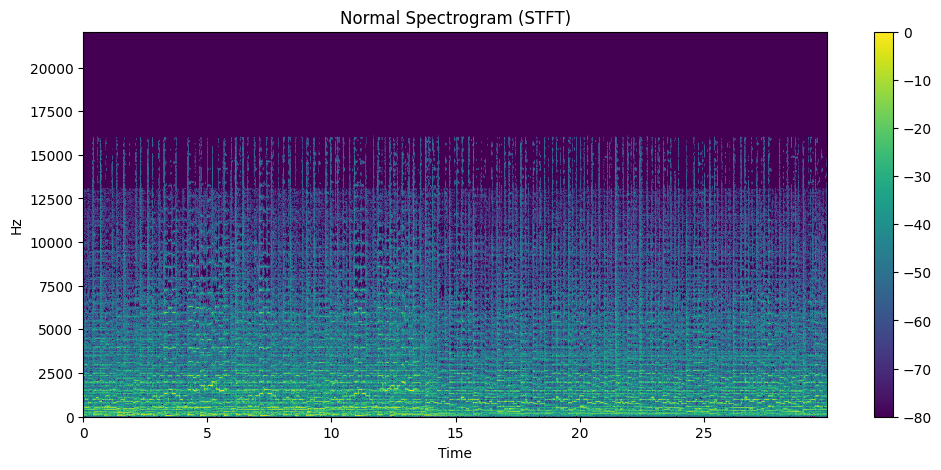

In [14]:
import numpy as np
audio_mono = librosa.to_mono(audio)

# Normal spectrogram
S = librosa.stft(audio_mono)
D = librosa.amplitude_to_db(np.abs(S), ref=np.max)

plt.figure(figsize=(12, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz', cmap='viridis')
plt.title("Normal Spectrogram (STFT)")
plt.colorbar()
plt.show()

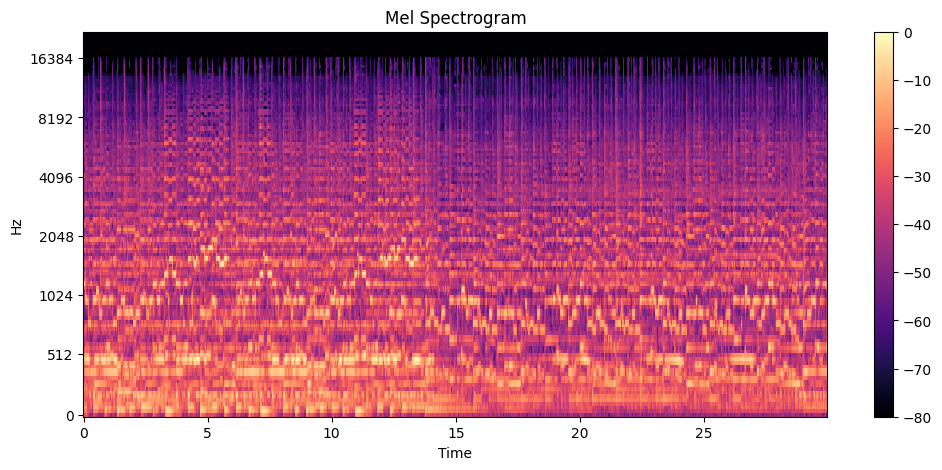

In [15]:
# Generating Mel Spectrogram
mel = librosa.feature.melspectrogram(y=audio_mono, sr=sr, n_mels=128)
mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(12, 5))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()


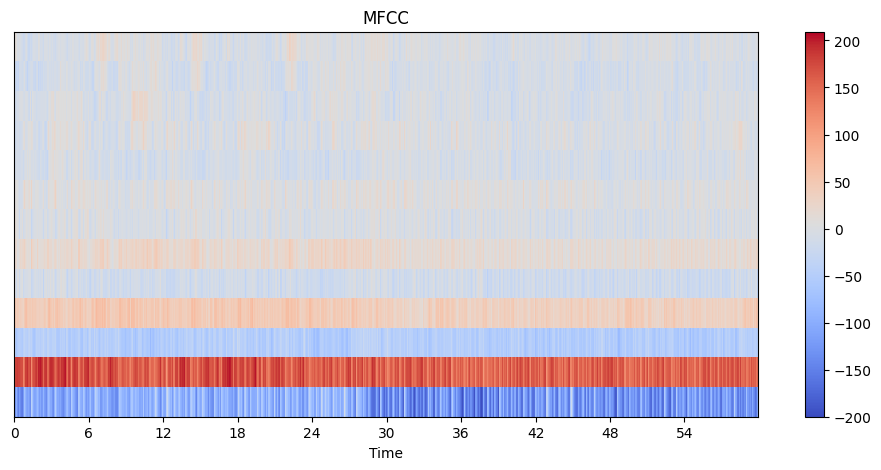

In [16]:
# Generating MFCC

mfcc = librosa.feature.mfcc(y=audio_mono, sr=sr, n_mfcc=13)

plt.figure(figsize=(12, 5))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title("MFCC")
plt.show()

Mel Spectrogram is best for the Project "CNN-Based Music Instrument Recognition System" as Musical instruments are recognized by their timbre, which depends on harmonic structures that are more easily captured on the Mel scale, where low frequencies (where most musical harmonics lie) are emphasized and high frequencies are compressed according to human hearing.

MFCC is a compressed version of the Mel spectrogram that keeps only a small number of coefficients.
This compression is helpful for speech recognition but removes high-frequency harmonic details that are crucial for identifying musical instruments (e.g., violin bow friction, guitar string resonances, cymbal overtones).
Therefore, although MFCC keeps the “most important” timbral features for speech, it throws away too much harmonic information for musical instruments, making it less suitable for CNNs.

